In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.io import readsav
from scipy.signal import find_peaks_cwt
from scipy.stats import spearmanr

from os import listdir
    #method listdir() returns a list containing the names of the entries in the directory given by path.
from os.path import isfile, join
    #returns true if file in path is an existing regular file

In [64]:
## !! set correct working directory
import os
path="/Users/jeroenhabets/Dropbox/PhD werkmap/DBS prediction project"
os.chdir(path)
os.getcwd() #check

'/Users/jeroenhabets/Dropbox/PhD werkmap/DBS prediction project'

In [65]:
### reading in excel database
data = pd.read_csv('dataOnOnvsOn.csv')
columns = data.keys()

In [66]:
data = data.fillna(np.mean(data,axis=0))

In [67]:
columns

Index(['PtNr', 'Check', 'Gender', 'Date_DBS', 'Age_DBS', 'Diagnosis', 'Target',
       'Disease_duration', 'Age_disease_onset', 'UPDRS.I_pre_on',
       'UPDRS.I_pre_off', 'UPDRS.II_pre_on', 'UPDRS.II_pre_off',
       'UPDRS.III_pre_on', 'UPDRS.III_pre_off', 'UPDRS.IV_pre_on',
       'UPDRS.IV_pre_off', 'Disease_subtype', 'LED_pre', 'Tremor_pre_on',
       'Tremor_pre_off', 'Axial_pre_on', 'Axial_pre_off',
       'Bradykinesia_pre_on', 'Bradykinesia_pre_off', 'Rigidity_pre_on',
       'Rigidity_pre_off', 'HY_pre_on', 'HY_pre_off', 'LED_post_1y',
       'UPDRS.I_post_1y_on.on', 'UPDRS.II_post_1y_on.on',
       'UPDRS.III_post_1y_on.on', 'UPDRS.IV_post_1y_on.on', 'HY_post_1y_on.on',
       'Tremor_post_1y_on.on', 'Axial_post_1y_on.on',
       'Bradykinesia_post_1y_on.on', 'Rigidity_post_1y_on.on',
       'UPDRS.I_post_1y_on.off', 'UPDRS.II_post_1y_on.off',
       'UPDRS.III_post_1y_on.off', 'UPDRS.IV_post_1y_on.off',
       'HY_post_1y_on.off', 'Tremor_post_1y_on.off', 'Axial_post_1y_on.

In [68]:
# removed dataDBS from x
features = ['Gender', 'Age_DBS', 'Disease_duration', 'Age_disease_onset', 'UPDRS.I_pre_on',
       'UPDRS.I_pre_off', 'UPDRS.II_pre_on', 'UPDRS.II_pre_off',
       'UPDRS.III_pre_on', 'UPDRS.III_pre_off', 'UPDRS.IV_pre_on',
       'UPDRS.IV_pre_off', 'Disease_subtype', 'LED_pre', 'Tremor_pre_on',
       'Tremor_pre_off', 'Axial_pre_on', 'Axial_pre_off',
       'Bradykinesia_pre_on', 'Bradykinesia_pre_off', 'Rigidity_pre_on',
       'Rigidity_pre_off', 'HY_pre_on', 'HY_pre_off','UPDRS.I_pre_LEDdif', 'UPDRS.II_pre_LEDdif', 'UPDRS.III_pre_LEDdif',
       'UPDRS.IV_pre_LEDdif', 'UPDRS.I_pre_%LEDdif', 'UPDRS.II_pre_%LEDdif',
       'UPDRS.III_pre_%LEDdif', 'UPDRS.IV_pre_%LEDdif']
x = data[features].values

y = data[['UPDRS.III_PrePost_MedON','UPDRS.IV_PrePost_MedON','LED_PrePostDiff']].values # .values excludes all panda's method


In [76]:
x[x== np.inf] = 0 # change inf's to zeros
y[y== np.inf] = 0 # change inf's to zeros

In [32]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [77]:
kf = KFold(n_splits=10,shuffle=True)
#est = LinearRegression()
est = GradientBoostingRegressor()

prediction = np.zeros(y.shape)

for train,test in kf.split(x):
    for i in range(3):
        est.fit(x[train,:],y[train,i])
        prediction[test,i]=est.predict(x[test,:])

In [78]:

for i in range(3):
    print(np.corrcoef(prediction[:,i],y[:,i])[0,1])

0.5673649368225399
0.48988562127585045
0.4798121542089768


In [51]:
import seaborn as sns

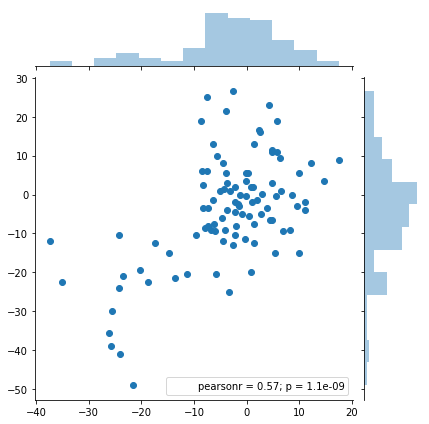

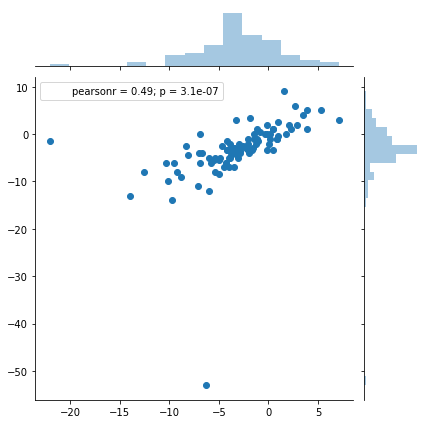

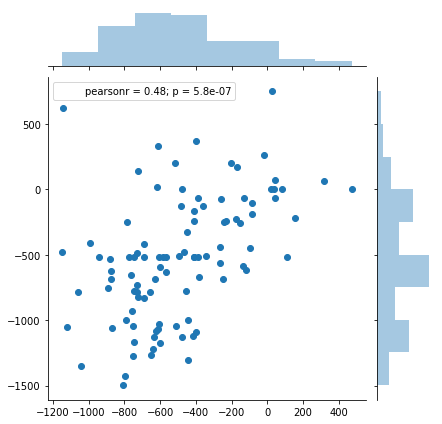

In [79]:
#new data
for i in range(3):
    plt.figure()
    sns.jointplot(prediction[:,i],y[:,i])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 <a list of 32 Text xticklabel objects>)

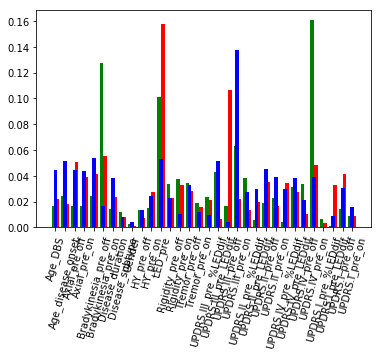

In [95]:
est.fit(x,y[:,2]) # LED difference
plt.bar(features,est.feature_importances_, color='red', align='edge', width=0.4)
est.fit(x,y[:,1]) # IV difference
plt.bar(features,est.feature_importances_, color='green', align='edge', width=-0.4)
est.fit(x,y[:,0]) # III difference
plt.bar(features,est.feature_importances_, color='blue', align='center', width=0.4)
plt.xticks(rotation=75)